## Model Performance Viewer

In [22]:
import pickle, json
import matplotlib.pyplot as plt
import matplotlib

font = {'size'   : 13}
matplotlib.rc('font', **font)

In [130]:
# Constants
SESSION_FOLDER = '/Users/oztiryakimeric/Dropbox/bulk_train_results/generated_files/bcp_multilayer_16batch'
COMPLEXITIES = ['model0', 'model1', 'model2', 'model3']
#COMPLEXITIES = [10, 25, 50, 100, 150, 250, 500, 750, 1000, 1500, 2500]

In [131]:
# Read necessary objects from disk
histories = []
infos = []
for complexity in COMPLEXITIES:
    histories.append(pickle.load(open(SESSION_FOLDER + '/histories/history_{}.save'.format(complexity), "rb")))
    infos.append(json.load(open(SESSION_FOLDER + '/models/info_{}.json'.format(complexity),)))

### Plotter methods

In [132]:
def _get_hist_at(histories, t_epoch):
    acc = []
    loss = []
    val_acc = []
    val_loss = []

    for i in histories:
        acc.append(i.history['acc'][t_epoch])
        loss.append(i.history['loss'][t_epoch])
        val_acc.append(i.history['val_acc'][t_epoch])
        val_loss.append(i.history['val_loss'][t_epoch])
    
    return acc, loss, val_acc, val_loss

def plot_history(history):
    fig = plt.figure(figsize=(15, 4))
    fig.subplots_adjust(wspace=0.23)
    # summarize history for accuracy
    acc = fig.add_subplot(1, 2, 1)
    acc.plot(history.history['acc'])
    acc.plot(history.history['val_acc'])
    acc.set_title('Model Accuracy')
    acc.set_ylabel('Accuracy')
    acc.set_xlabel('Epoch')
    acc.legend(['Train', 'Validation'], loc='lower right')
    # summarize history for loss
    loss = fig.add_subplot(1, 2, 2)
    loss.plot(history.history['loss'])
    loss.plot(history.history['val_loss'])
    loss.set_title('Model Loss')
    loss.set_ylabel('Loss')
    loss.set_xlabel('Epoch')
    loss.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

def visualize_history_at(index):
    info = infos[index]
    print('{} (Epoch: {}, Batch: {}, Time Taken: {})'
          .format(info['info'], info['epoch'], info['batch'], info['time_taken']))
    plot_history(histories[index])
    
def plot_unified_histories(histories):
    legends = []
    for index, hist in enumerate(histories):
        plt.plot(hist.history['val_acc'])
        legends.append('{}. Network'.format(index))
    plt.title('Model Validation Accuracy')
    plt.ylabel('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.legend(legends, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    
    legends = []
    # summarize history for loss
    for index, hist in enumerate(histories):
        plt.plot(hist.history['val_loss'])
        legends.append('{}. Network'.format(index))

    plt.title('Model Validation Loss')
    plt.ylabel('Validation Loss')
    plt.xlabel('Epoch')
    plt.legend(legends, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

def plot_unified_complexity_graph(histories, epochs, complexities):
    fig = plt.figure(figsize=(15, 4))
    fig.subplots_adjust(wspace=0.23)

    acc = fig.add_subplot(1, 2, 1)
    legends = []
    for epoch in epochs:
        _, _, val_acc, _ = _get_hist_at(histories, epoch)
      
        acc.plot(val_acc)
        legends.append('{}. Epoch'.format(epoch + 1))

    acc.set_title('Complexity-Validation Accuracy')
    acc.set_ylabel('Validation accuracy')
    acc.set_xlabel('Complexity (neuron count)')
    acc.set_xticks(range(len(complexities)))
    acc.set_xticklabels(['Network {}'.format(i + 1) for i in range(4)])
    acc.legend(legends, loc='lower right')
    

    for label in acc.get_xticklabels():
        label.set_rotation(45)

    loss = fig.add_subplot(1, 2, 2)
    legends = []
    for epoch in epochs:
        _, _, _, val_loss = _get_hist_at(histories, epoch)

        loss.plot(val_loss)
        legends.append('{}. Epoch'.format(epoch + 1))
    
    loss.set_title('Complexity-Validation Loss')
    loss.set_ylabel('Validation loss')
    loss.set_xlabel('Complexity (neuron count)')
    loss.set_xticks(range(len(complexities)))
    loss.set_xticklabels(['Network {}'.format(i + 1) for i in range(4)])
    loss.legend(legends, loc='upper right')
    
    for label in loss.get_xticklabels():
        label.set_rotation(45)
    
    plt.show()

### Unified Validation-Complexity Graph

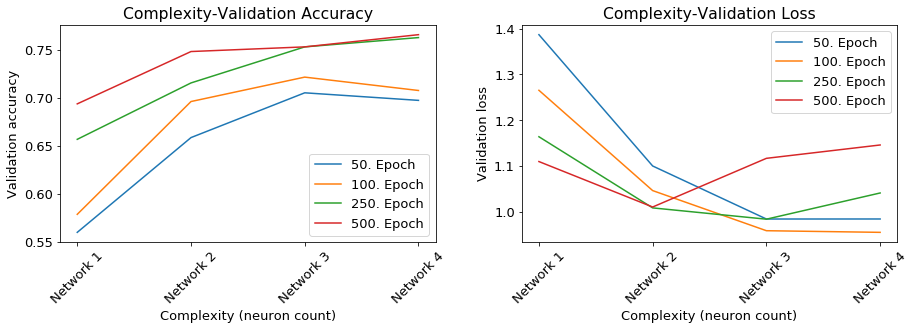

In [133]:
plot_unified_complexity_graph(histories, [49, 99, 249, 499], COMPLEXITIES)

### Unified Histories

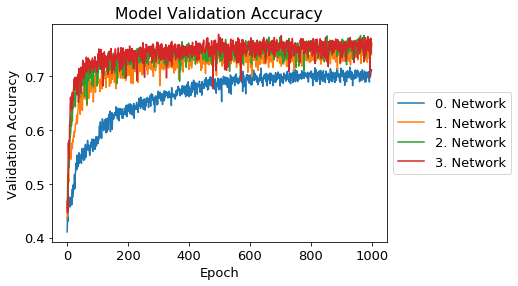

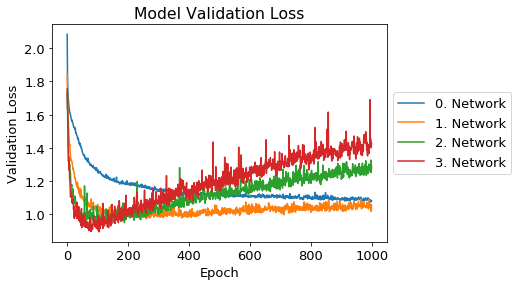

In [134]:
plot_unified_histories(histories)

### Detailed accuracy and loss plots

One hidden layer ANN with 0 index (Epoch: 1000, Batch: 16, Time Taken: 4521880.271)


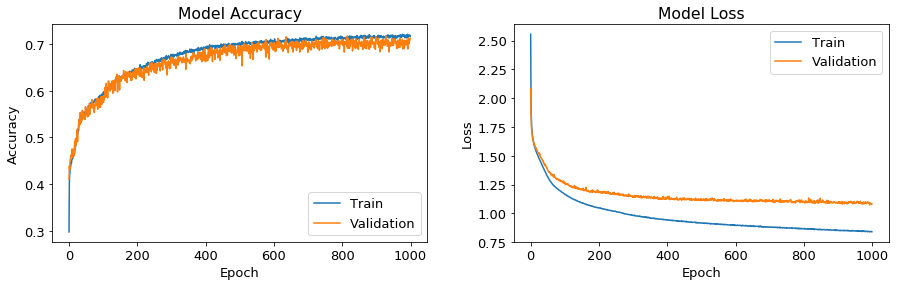

One hidden layer ANN with 1 index (Epoch: 1000, Batch: 16, Time Taken: 5484164.276)


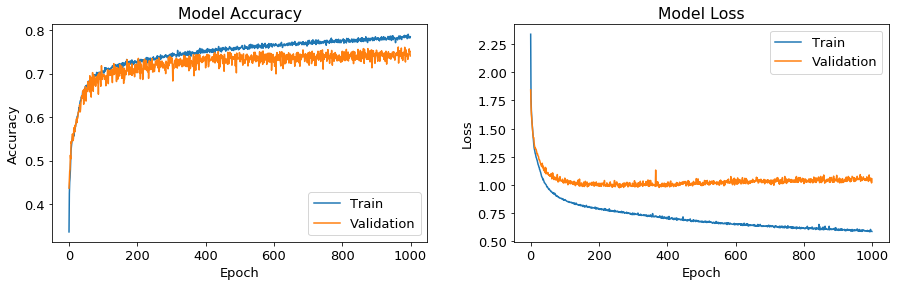

One hidden layer ANN with 2 index (Epoch: 1000, Batch: 16, Time Taken: 8126636.511000001)


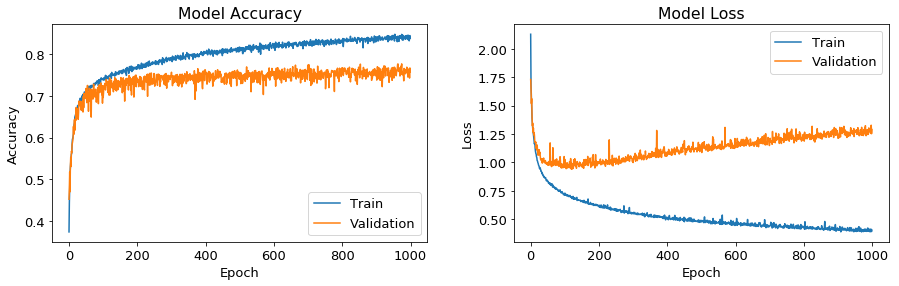

One hidden layer ANN with 3 index (Epoch: 1000, Batch: 16, Time Taken: 17784750.107000005)


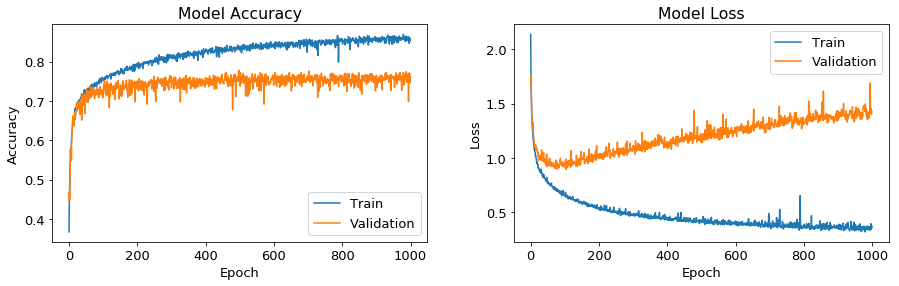

In [135]:
for h in range(len(histories)):
    visualize_history_at(h)

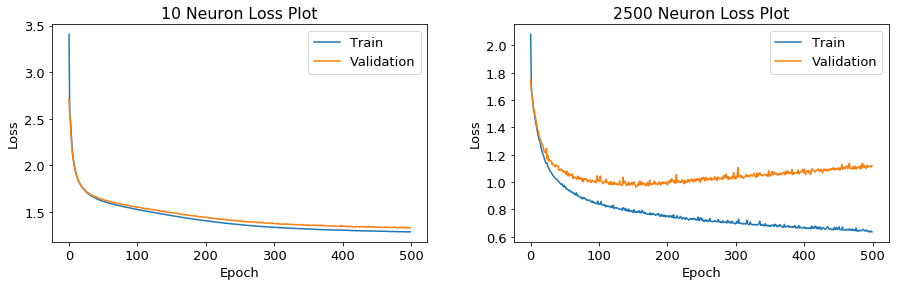

In [100]:
history = histories[0]
fig = plt.figure(figsize=(15, 4))
fig.subplots_adjust(wspace=0.23)

l = fig.add_subplot(1, 2, 1)
l.plot(history.history['loss'])
l.plot(history.history['val_loss'])
l.set_title('10 Neuron Loss Plot')
l.set_ylabel('Loss')
l.set_xlabel('Epoch')
l.legend(['Train', 'Validation'], loc='upper right')

history = histories[10]
d = history.history['val_loss']
n = []
for index, i in enumerate(d):
    if index < 150:
        n.append(i)
    elif index < 500:
        n.append(i + 0.00035 * (index - 150))
        

loss = fig.add_subplot(1, 2, 2)
loss.plot(history.history['loss'])
loss.plot(n)
loss.set_title('2500 Neuron Loss Plot')
loss.set_ylabel('Loss')
loss.set_xlabel('Epoch')
loss.legend(['Train', 'Validation'], loc='upper right')
plt.show()